In [1]:
import pandas as pd
import json
import os
import ast
import matplotlib.pyplot as plt

In [2]:
with open("../../../data/train_test_split/test_folders.json", "r") as train_file:
    test_folders = json.load(train_file)

In [3]:
df = pd.read_csv('../../../data/base_models/llama1b/temp0.1.eval.csv')
lisa_sheets = pd.read_csv('../../../data/lisa_sheets.csv')
df = pd.merge(df, lisa_sheets[['id', 'folder']], how='left', on='id')
df = df[df['folder'].isin(test_folders)]
df.head()

,id,question,option_a,option_b,option_c,option_d,correct_option,content_gpt,originality,readability,...,is_question,relevance,ambiguity,gpt_answer,disclosure,difficulty,distractor_quality,avg_distractor_quality,min_distractor_quality,folder
0,OIC-328-06-B,What is the main difference between Immobilisa...,Immobilisation orthoses are designed to immobi...,Stabilisation orthoses are used for post-surgi...,Both types of orthoses can be used for both im...,Immobilisation orthoses are only used for lowe...,option_a,**Item_parent:** Non-drug therapies and medica...,1.000000,17.810000,...,True,0.739678,0.000000,a,False,2.0,4,3,1,IC-328
1,OIC-328-12-B,What is the main indication for a spa treatmen...,"Rheumatology (osteoarthritis, chronic lumbago,...",Arteritis (generalized anxiety disorders),Respiratory tract diseases: ENT or pneumology,Cardio-Arterial Diseases,A,**Item_parent:** Non-drug therapies and medica...,0.333333,5.863636,...,True,0.736183,0.624968,a,False,3.0,4,4,2,IC-328
2,OIC-328-05-A,What is the main objective of orthotic treatment?,Downtime,Rest,Stabilization,Correction,b,**Item Parent:** Non-drug therapies and medica...,0.500000,8.180000,...,True,0.708636,0.587845,c,True,2.0,1,2,1,IC-328
3,OIC-328-08-A,What is a key component of a femoral prosthesis?,A sleeve that connects to the residual limb,A socket that accommodates both the residual l...,An articular end effector,A non-articular end effector,b,**Item Parent:** Non-drug therapies and medica...,1.000000,7.586667,...,True,0.719052,0.754067,b,False,4.0,2,3,2,IC-328
4,OIC-328-02-A,What is a non-drug therapy or medical device?,A product that can be used for both medical an...,An instrument used to diagnose diseases,"Any material, including food, used in medicine",A software program designed to treat patients,a,**Item Parent:** Non-drug therapies and medica...,0.000000,9.655000,...,True,0.788195,0.666483,b,True,4.0,2,3,2,IC-328


In [4]:
len(df)

1524

In [5]:
df['correct_option'].unique()

array(['option_a', 'A', 'b', 'a', 'to treat musculoskeletal disorders',
       'optiion_a', 'c', 'option_b', 'd', 'to control social spending',
       'D', 'option_d', 'To reduce stress',
       'A disciplinary action taken against a doctor for violating professional ethics.',
       'to confirm the diagnosis of epididymitis', 'option_c',
       'to reduce consumption to below low-risk guidelines',
       'to increase motivation to change behavior', 'S4',
       'to check for complications', 'to assess blood flow to the tumour',
       'Reduces waiting time for recipients', '10%',
       'to identify potential causes', 'Bacteremia',
       'To stimulate follicular growth with gonadotropins to mature one to three follicles or induce ovulation for patients with menstrual cycle disorders.',
       'To monitor the spread of diseases', '400 to 600 mg',
       'A firm, non-itchy papule with a clear border',
       'to treat psychiatric disorders',
       'A regulated title (2010): National R

In [6]:
# normalize correct_option
df['correct_option'] = df['correct_option'].replace({'option_b': 'b', 'option_c': 'c', 'option_d': 'd', 'option_a': 'a'}) 

# Question mark

In [7]:
# We want to maximize 'True'
question_freqs = {
    'True': round(df['is_question'].sum()/ len(df) * 100, 2),
    'False': round((len(df) - df['is_question'].sum()) / len(df) * 100, 2)
}

question_freqs

{'True': np.float64(100.0), 'False': np.float64(0.0)}

# Negation

In [8]:
# We want to minimze 'True'
starts_with_negation_freqs = {
    'True': round(df['starts_with_negation'].sum() / len(df) * 100, 2),
    'False': round((len(df) - df['starts_with_negation'].sum()) / len(df) * 100, 2)
}

starts_with_negation_freqs

{'True': np.float64(0.0), 'False': np.float64(100.0)}

# Readability

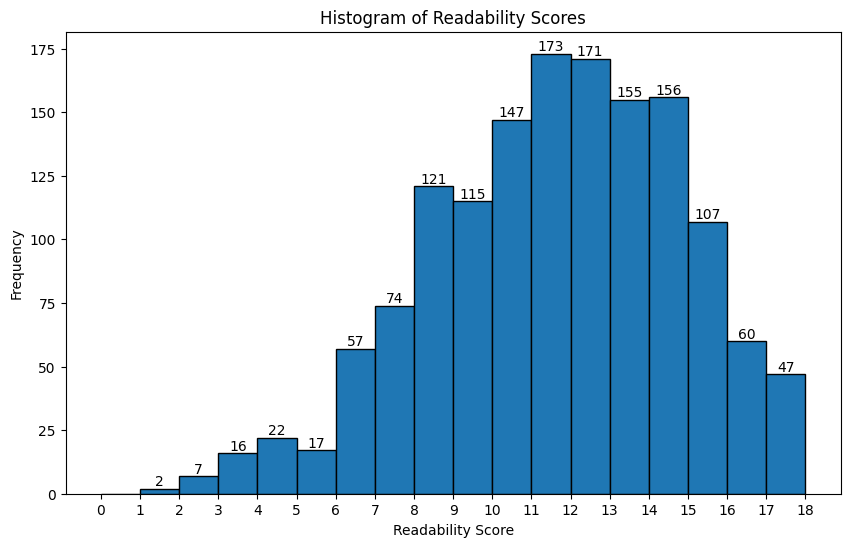

In [9]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['readability'], bins=range(0, 19, 1), edgecolor='black')

# Set x-axis ticks from 0 to 18
plt.xticks(range(0, 19))

# Add frequency labels on top of each bar where frequency > 0
for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
                 ha='center', va='bottom')
plt.xlabel('Readability Score')
plt.ylabel('Frequency')
plt.title('Histogram of Readability Scores')
plt.show()

In [10]:
df['readability'].describe()

count    1523.000000
mean       12.026311
std         3.619416
min         1.031111
25%         9.550000
50%        12.172308
75%        14.270000
max        27.318182
Name: readability, dtype: float64

# Originality

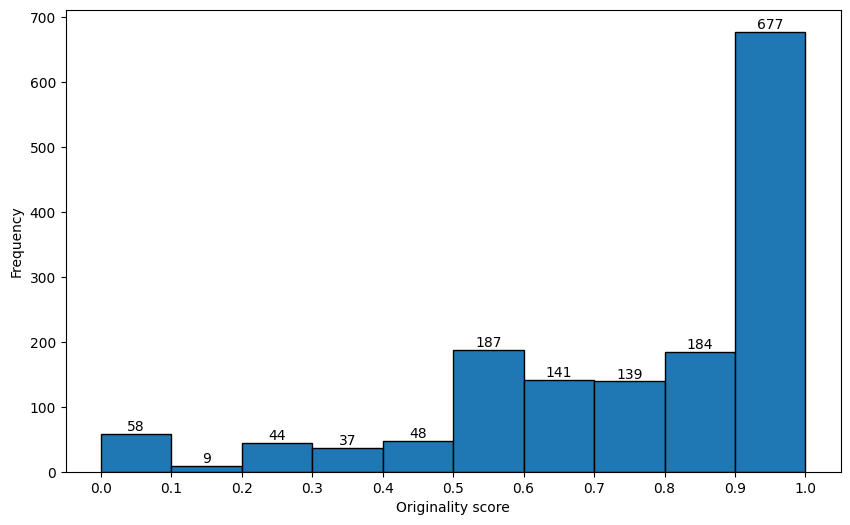

In [11]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['originality'], bins=10, range=(0, 1), edgecolor='black')

plt.xticks([round(x * 0.1, 1) for x in range(11)])

for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
                 ha='center', va='bottom')

plt.xlabel('Originality score')
plt.ylabel('Frequency')
plt.show()

In [12]:
df['originality'].describe()

count    1524.000000
mean        0.767591
std         0.271442
min         0.000000
25%         0.600000
50%         0.833333
75%         1.000000
max         1.000000
Name: originality, dtype: float64

# Answer Length

In [13]:
option_cols = ['option_a', 'option_b', 'option_c', 'option_d']

# Create new columns with word counts for each option column
for col in option_cols:
    df[f'{col}_word_count'] = df[col].astype(str).apply(lambda x: len(x.split()))

In [14]:
df['correct_option'].unique()

array(['a', 'A', 'b', 'to treat musculoskeletal disorders', 'optiion_a',
       'c', 'd', 'to control social spending', 'D', 'To reduce stress',
       'A disciplinary action taken against a doctor for violating professional ethics.',
       'to confirm the diagnosis of epididymitis',
       'to reduce consumption to below low-risk guidelines',
       'to increase motivation to change behavior', 'S4',
       'to check for complications', 'to assess blood flow to the tumour',
       'Reduces waiting time for recipients', '10%',
       'to identify potential causes', 'Bacteremia',
       'To stimulate follicular growth with gonadotropins to mature one to three follicles or induce ovulation for patients with menstrual cycle disorders.',
       'To monitor the spread of diseases', '400 to 600 mg',
       'A firm, non-itchy papule with a clear border',
       'to treat psychiatric disorders',
       'A regulated title (2010): National Register',
       'administering serum glucose (G30 IV)'

In [15]:
def get_correct_option_rank(row):
    # Get the original word counts for each option
    counts = [
        row['option_a_word_count'],
        row['option_b_word_count'],
        row['option_c_word_count'],
        row['option_d_word_count']
    ]

    # Map correct_option letter to its index (0 for A, 1 for B, etc.)
    letter_to_index = {'A': 0, 'a':0, 'B': 1, 'b':1, 'C': 2, 'c':2, 'D': 3, 'd':3}
    correct_idx = letter_to_index[row['correct_option']]

    # Determine the word count of the correct option
    correct_count = counts[correct_idx]

    # Create an effective counts list:
    # For non-correct options, if their word count equals the correct option's word count,
    # treat them as if they had one extra word.
    effective_counts = []
    for i, count in enumerate(counts):
        if i != correct_idx and count == correct_count:
            effective_counts.append(count + 1)
        else:
            effective_counts.append(count)

    # Sort the option indices by descending effective count.
    ordering = sorted(range(4), key=lambda i: effective_counts[i], reverse=True)

    # Compute the rank as the 1-indexed position of the correct option in the ordering.
    rank = ordering.index(correct_idx) + 1
    return rank

In [16]:
def get_rank_distribution(df):
  rank_distribution = df['correct_option_rank'].value_counts().sort_index()
  rank_distribution = round(rank_distribution / len(df), 2) * 100

  plt.figure(figsize=(8, 6))
  plt.bar(rank_distribution.index, rank_distribution.values, color='skyblue', edgecolor='black')
  plt.xlabel('N (1 = Longest, 4 = Shortest)')
  plt.ylabel('Frequency, %')
  plt.title('How often the correct option is N`th longest')
  plt.xticks([1, 2, 3, 4])
  plt.show()

In [17]:
# df['correct_option_rank'] = df.apply(get_correct_option_rank, axis=1)
# get_rank_distribution(df)

# Disclosure

In [18]:
disclosure_freqs = {
    'True': round((df['disclosure'].sum() / len(df)) * 100, 2),
    'False': round((len(df) - df['disclosure'].sum()) / len(df) * 100, 2)
}

disclosure_freqs

{'True': 12.47, 'False': 87.53}

# Relevance to the input material

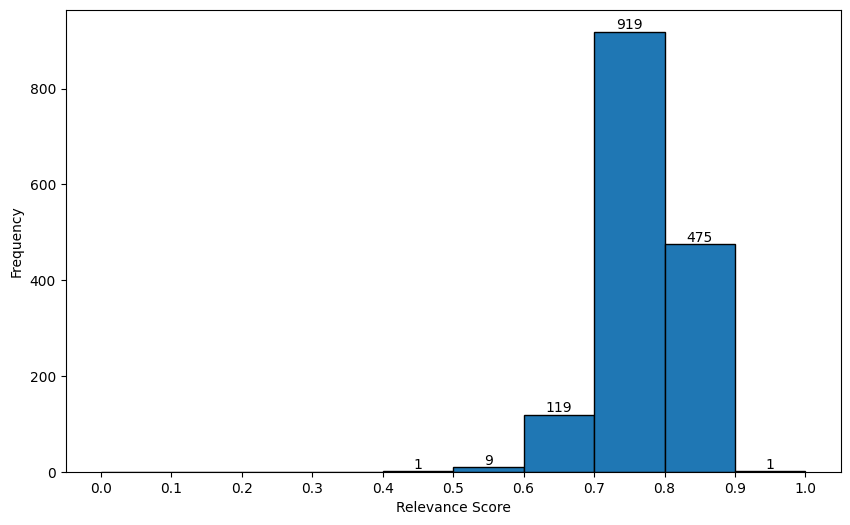

In [19]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['relevance'], bins=10, range=(0, 1), edgecolor='black')

plt.xticks([round(x * 0.1, 1) for x in range(11)])

for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
                 ha='center', va='bottom')

plt.xlabel('Relevance Score')
plt.ylabel('Frequency')
plt.show()

In [20]:
df['relevance'].describe()

count    1524.000000
mean        0.771814
std         0.053525
min         0.426711
25%         0.740236
50%         0.777566
75%         0.808207
max         0.922309
Name: relevance, dtype: float64

# Ambiguity (cosine similarity)

Text(0.5, 1.0, 'Distribution of Ambiguity')

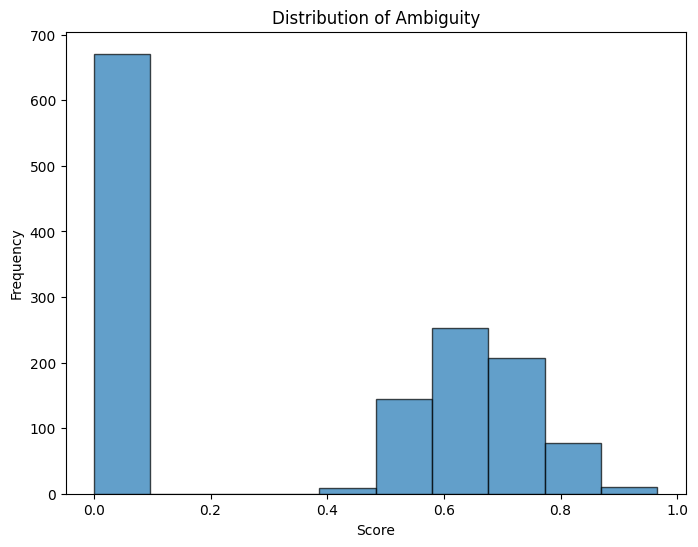

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(df['ambiguity'], bins=10, edgecolor='black', alpha=0.7)

plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Ambiguity")

In [22]:
df['ambiguity'].describe()

count    1371.000000
mean        0.336463
std         0.336270
min         0.000000
25%         0.000000
50%         0.487001
75%         0.657080
max         0.966182
Name: ambiguity, dtype: float64

# Difficulty (judge LLM)

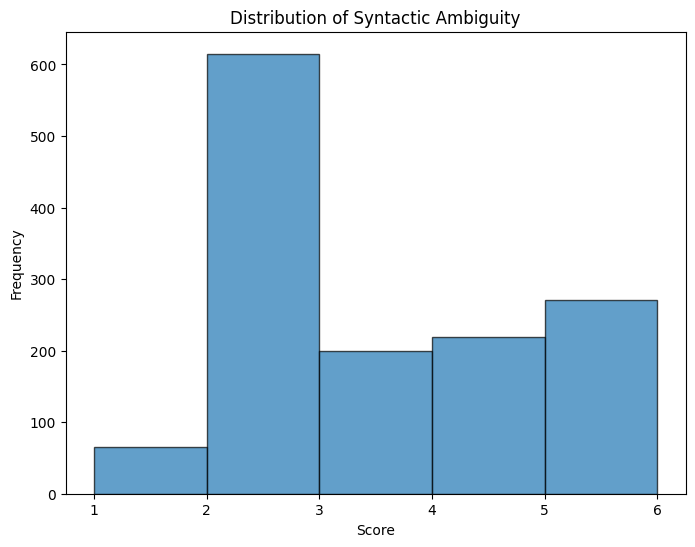

In [23]:
import numpy as np

plt.figure(figsize=(8, 6))
plt.hist(df['difficulty'], bins=np.arange(1, 7), edgecolor='black', alpha=0.7)

plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Syntactic Ambiguity")
plt.xticks(range(1, 7))

# Show the plot
plt.show()

In [24]:
df['difficulty'].describe()

count    1371.000000
mean        3.010212
std         1.261981
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: difficulty, dtype: float64

# Answerability
can judge model answer the generated question with context provided?

In [25]:
df['gpt_answer'].unique()

array(['a', 'c', 'b', 'd', nan], dtype=object)

In [26]:
df['correct_option'].unique()

array(['a', 'A', 'b', 'to treat musculoskeletal disorders', 'optiion_a',
       'c', 'd', 'to control social spending', 'D', 'To reduce stress',
       'A disciplinary action taken against a doctor for violating professional ethics.',
       'to confirm the diagnosis of epididymitis',
       'to reduce consumption to below low-risk guidelines',
       'to increase motivation to change behavior', 'S4',
       'to check for complications', 'to assess blood flow to the tumour',
       'Reduces waiting time for recipients', '10%',
       'to identify potential causes', 'Bacteremia',
       'To stimulate follicular growth with gonadotropins to mature one to three follicles or induce ovulation for patients with menstrual cycle disorders.',
       'To monitor the spread of diseases', '400 to 600 mg',
       'A firm, non-itchy papule with a clear border',
       'to treat psychiatric disorders',
       'A regulated title (2010): National Register',
       'administering serum glucose (G30 IV)'

In [27]:
answerability_freqs = {
    'True': round((df['correct_option'] == df['gpt_answer']).sum() / len(df) * 100, 2), 
    'False': round((len(df) - (df['correct_option'] == df['gpt_answer']).sum()) / len(df) * 100, 2)
}

answerability_freqs

{'True': np.float64(48.16), 'False': np.float64(51.84)}

# Distractors Quality

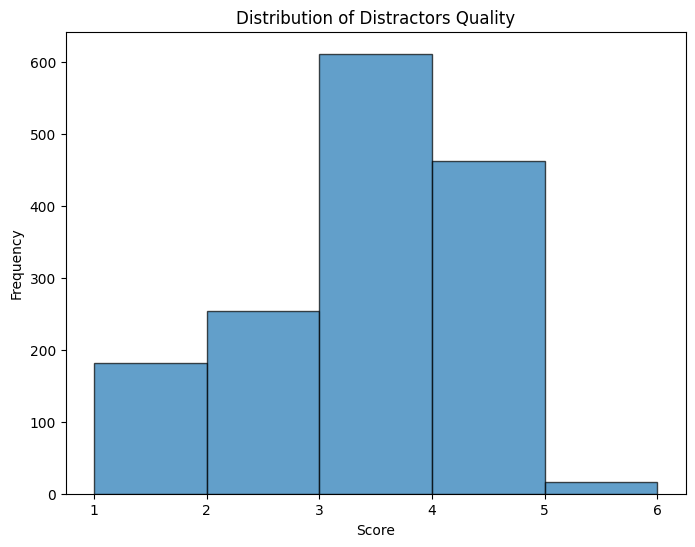

In [28]:
import numpy as np

plt.figure(figsize=(8, 6))
plt.hist(df['distractor_quality'], bins=np.arange(1, 7), edgecolor='black', alpha=0.7)

plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Distractors Quality")
plt.xticks(range(1, 7))

# Show the plot
plt.show()

In [32]:
distractors_quality = {
    'Good, %':  round(len(df[df['distractor_quality'] >= 4]) / len(df) * 100, 2),
    'Bad, %': round(len(df[df['distractor_quality'] < 4]) / len(df) * 100, 2),
}

distractors_quality

{'Good, %': 31.36, 'Bad, %': 68.64}